In [73]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [74]:
#loading data set
df=pd.read_csv('Data sets\\breast_cancer_stage_prediction.csv')

In [75]:
df.head()

,Tumor_Size,Nodes_Positive,Metastasis,Histological_Grade,ER_Status,PR_Status,HER2_Status,Stage
0,3.807947,7.0,0,1,1,1,0,III
1,7.346740,7.0,1,2,1,1,1,IV
2,6.026719,4.0,0,3,0,0,1,III
3,1.644585,0.0,1,2,0,0,1,IV
4,0.675028,4.0,0,1,0,1,1,I


In [76]:
list(df.columns)

['Tumor_Size',
 'Nodes_Positive',
 'Metastasis',
 'Histological_Grade',
 'ER_Status',
 'PR_Status',
 'HER2_Status',
 'Stage']

# Checking for null values

In [77]:

df.isnull().sum()

Tumor_Size            0
Nodes_Positive        0
Metastasis            0
Histological_Grade    0
ER_Status             0
PR_Status             0
HER2_Status           0
Stage                 0
dtype: int64

In [6]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
numerical_columns = df.select_dtypes(exclude=['category', 'object']).columns

In [7]:
df['Stage'].value_counts

<bound method IndexOpsMixin.value_counts of 0      III
1       IV
2      III
3       IV
4        I
      ... 
984     IV
985      I
986     IV
987      I
988     II
Name: Stage, Length: 989, dtype: object>

In [8]:
df[categorical_columns].isnull().sum()

Stage    0
dtype: int64

In [9]:
df[numerical_columns].isnull().sum()

Tumor_Size            0
Nodes_Positive        0
Metastasis            0
Histological_Grade    0
ER_Status             0
PR_Status             0
HER2_Status           0
dtype: int64

In [10]:
df['Nodes_Positive'].value_counts

<bound method IndexOpsMixin.value_counts of 0      7.0
1      7.0
2      4.0
3      0.0
4      4.0
      ... 
984    7.0
985    2.0
986    7.0
987    0.0
988    4.0
Name: Nodes_Positive, Length: 989, dtype: float64>

# Box plot

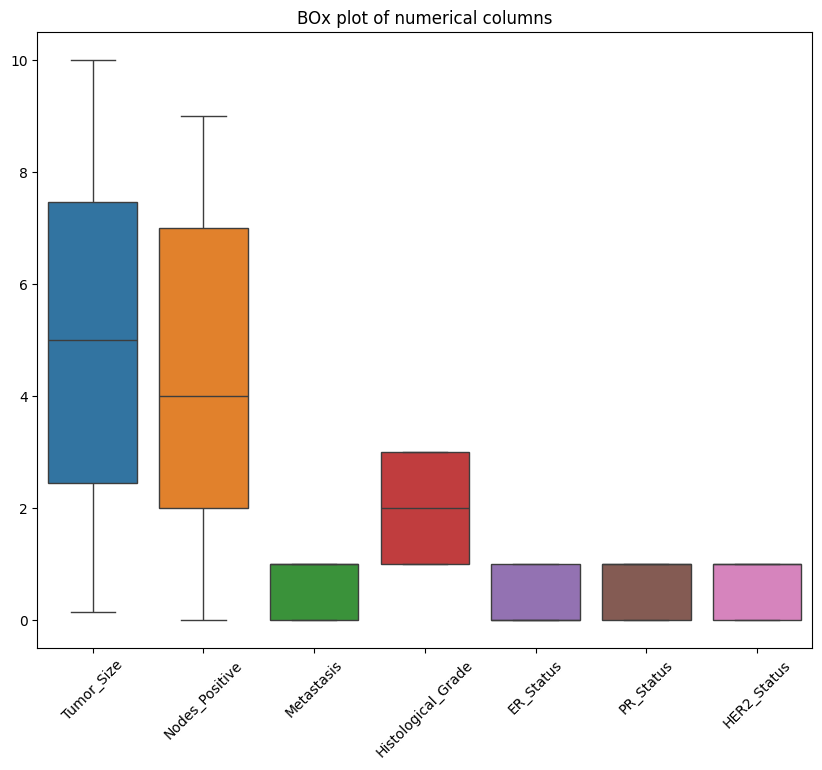

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation =45)
plt.title("BOx plot of numerical columns")
plt.show()

In [12]:
df[numerical_columns].describe()

,Tumor_Size,Nodes_Positive,Metastasis,Histological_Grade,ER_Status,PR_Status,HER2_Status
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,4.948870,4.450961,0.518706,1.977755,0.483316,0.516684,0.506572
std,2.889223,2.879649,0.499903,0.834183,0.499974,0.499974,0.500210
min,0.145857,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.448545,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,5.005364,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,7.465068,7.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,9.997205,9.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [13]:
#Filling NAN values of numerical_column(Nodes_Positive)

In [14]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df[numerical_columns].isnull().sum()

Tumor_Size            0
Nodes_Positive        0
Metastasis            0
Histological_Grade    0
ER_Status             0
PR_Status             0
HER2_Status           0
dtype: int64

In [15]:
#Filling NAN values of categorical_column(stage)

In [16]:
df['Stage'] = df['Stage'].fillna(df['Stage'].mode()[0])

In [17]:
df.head()

,Tumor_Size,Nodes_Positive,Metastasis,Histological_Grade,ER_Status,PR_Status,HER2_Status,Stage
0,3.807947,7.0,0,1,1,1,0,III
1,7.346740,7.0,1,2,1,1,1,IV
2,6.026719,4.0,0,3,0,0,1,III
3,1.644585,0.0,1,2,0,0,1,IV
4,0.675028,4.0,0,1,0,1,1,I


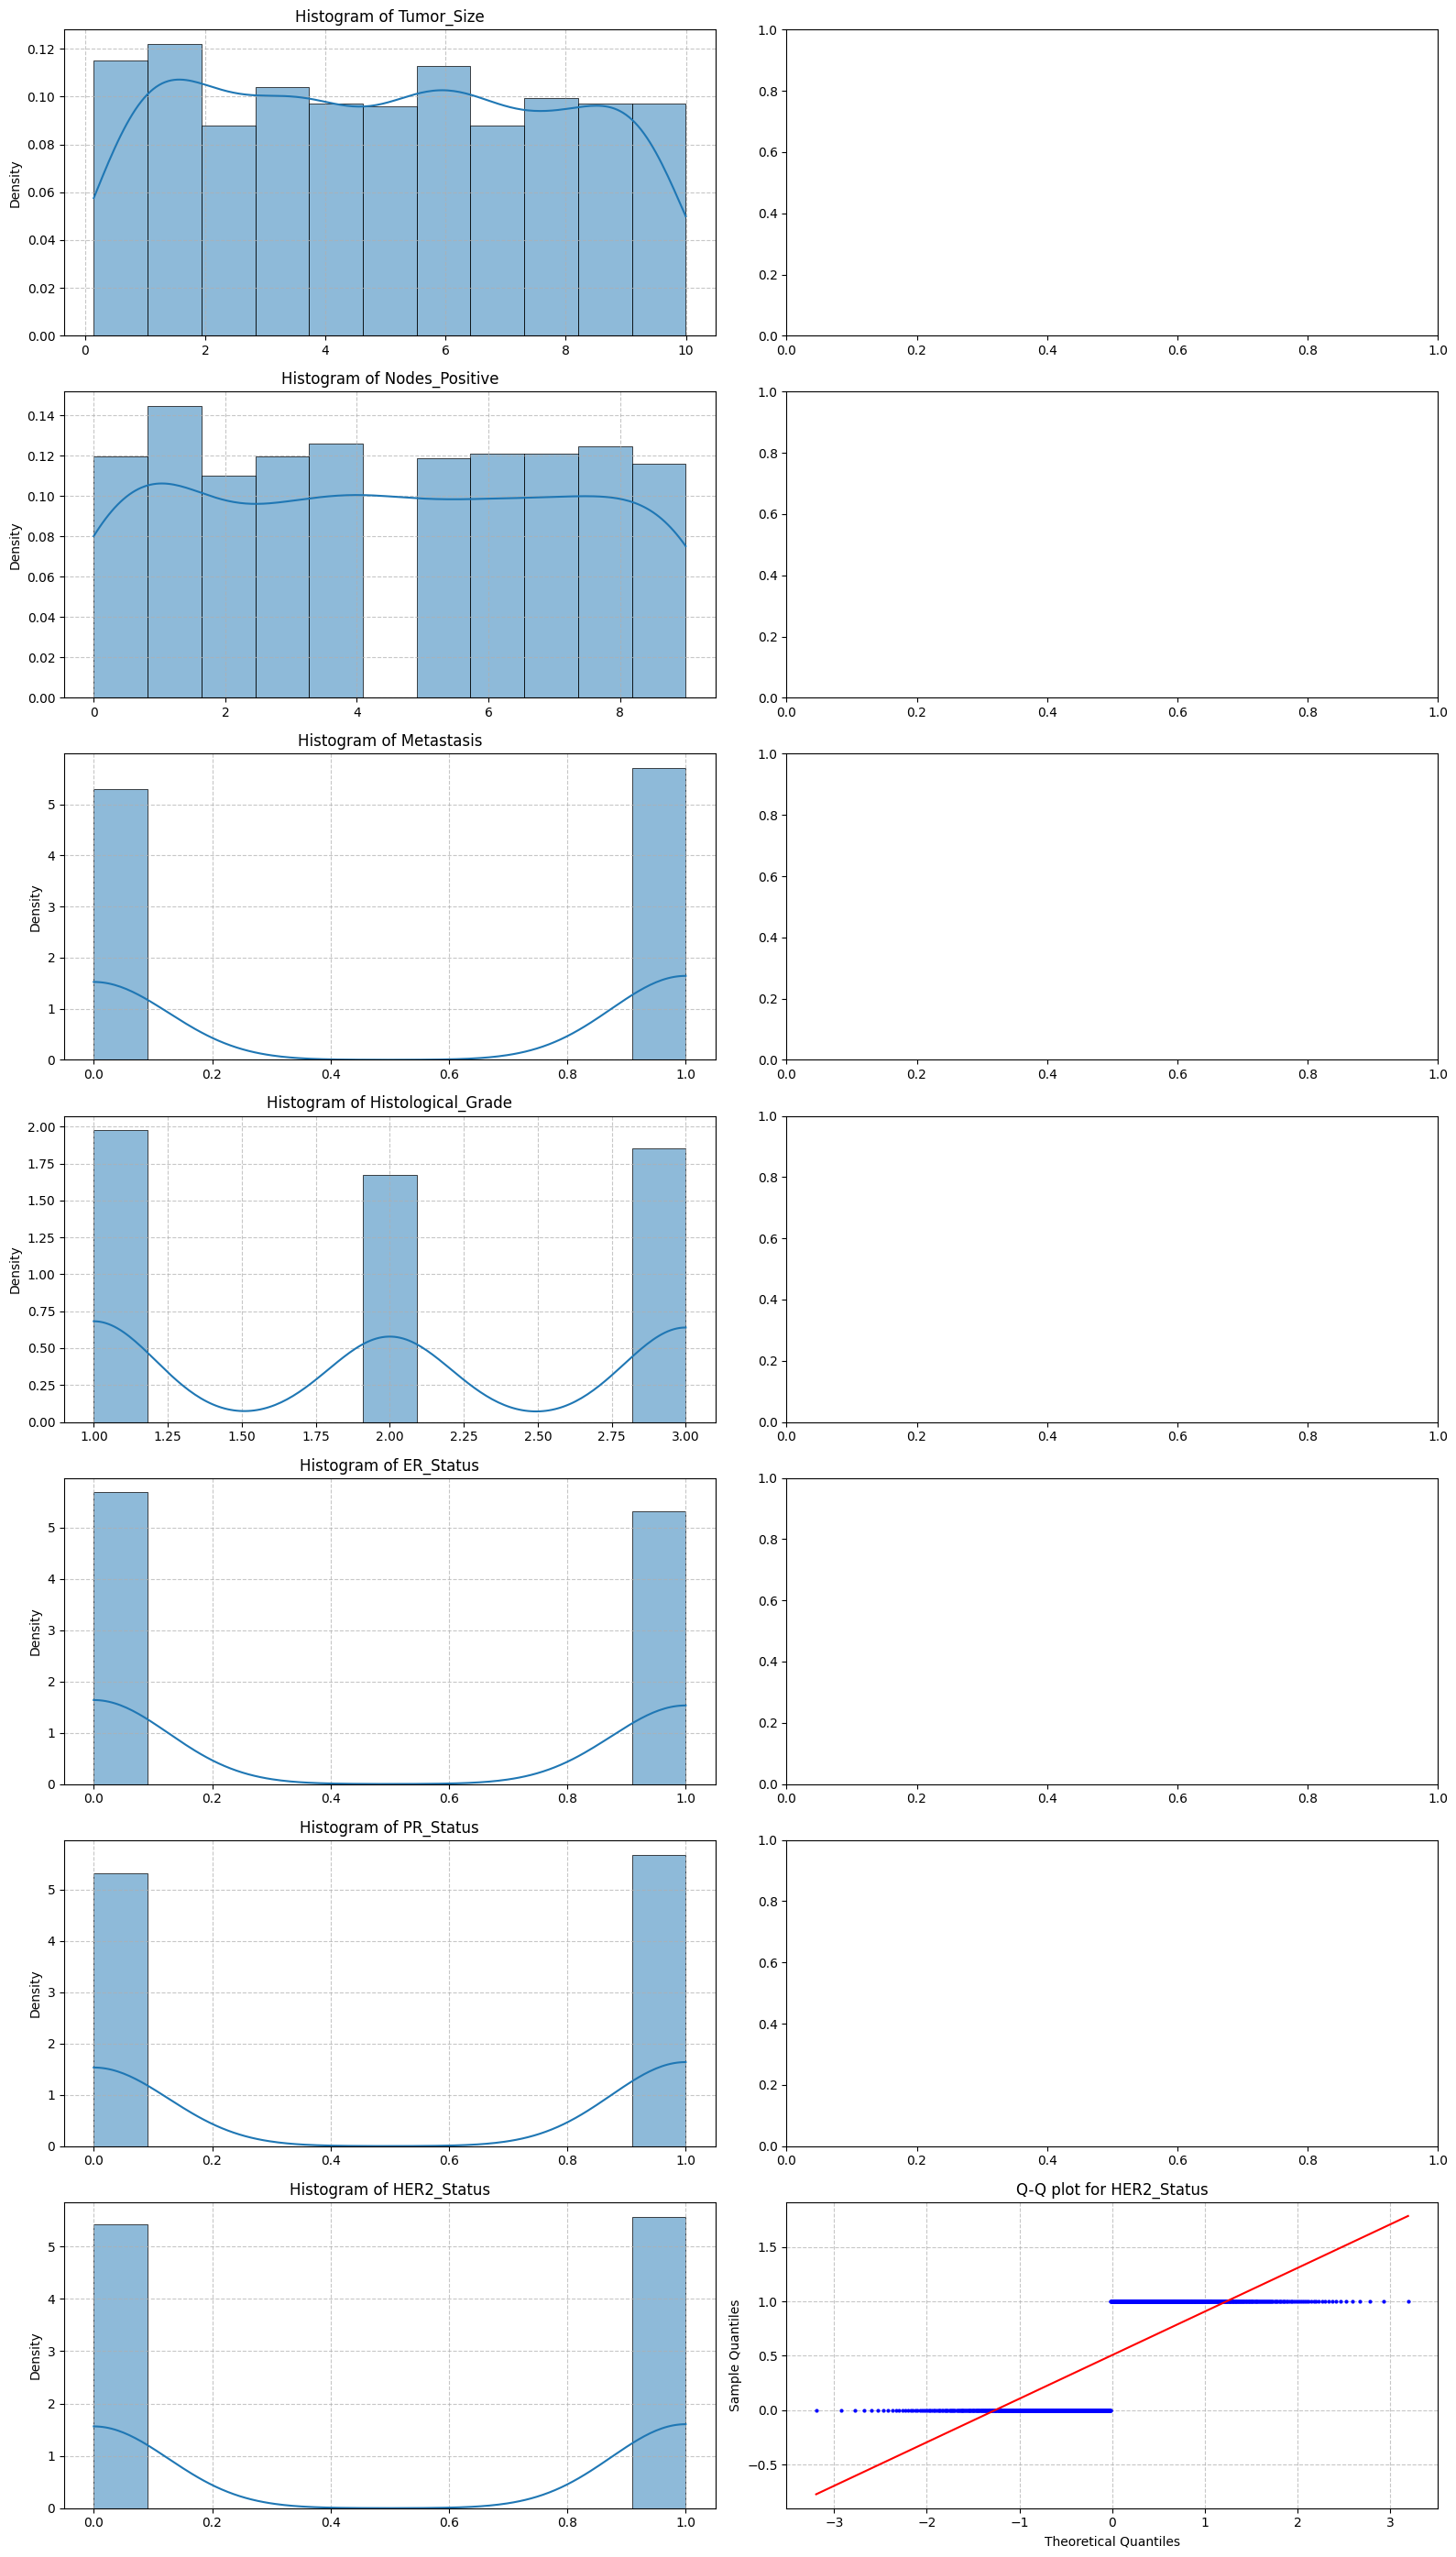

In [18]:
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols * 4))

# Plotting histograms and Q-Q plots for each numerical column
for i, col in enumerate(numerical_columns):
    # Histogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], stat='density', linewidth=0.5)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, linestyle="--", alpha=0.7)
from scipy.stats import anderson, jarque_bera, shapiro, normaltest, kstest
from statsmodels.stats.diagnostic import lilliefors

    # Q-Q plot on the right subplot
stats.probplot(df[col], dist='norm', plot=axes[i, 1], fit=True)
axes[i, 1].get_lines()[0].set_markersize(2.0)
axes[i, 1].grid(True, linestyle="--", alpha=0.7)
axes[i, 1].set_title(f'Q-Q plot for {col}')
axes[i, 1].set_xlabel('Theoretical Quantiles')
axes[i, 1].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

# checking if the distribution is normal or not

In [19]:
from scipy.stats import anderson, jarque_bera, shapiro, normaltest, kstest
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors  # Corrected import


# Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')
    
    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')
    
    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test: {col} does not look normally distributed (reject H0)')
    
    # Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')


# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
    # Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    
    # Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
    
    print('\n')


# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality(df, col)

Column: Tumor_Size
Shapiro-Wilk Test: Statistics=0.950, p-value=0.000
Shapiro-Wilk Test: Tumor_Size does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=12.440
Anderson-Darling Test: Critical Values: [0.574 0.653 0.784 0.914 1.088]
Anderson-Darling Test: Tumor_Size does not look normally distributed (reject H0)
Jarque-Bera Test: JB statistic=62.695, p-value=0.000
Jarque-Bera Test: Tumor_Size does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=943.918, p-value=0.000
D'Agostino and Pearson's Test: Tumor_Size does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=0.779, p-value=0.000
Kolmogorov-Smirnov Test: Tumor_Size does not look normally distributed (reject H0)
Lilliefors Test: Statistics=0.067, p-value=0.001
Lilliefors Test: Tumor_Size does not look normally distributed (reject H0)


Column: Nodes_Positive
Shapiro-Wilk Test: Statistics=0.934, p-value=0.000
Shapiro-Wilk Test: Nodes_Positive 

## Checking for outliers

In [29]:
def find_outliers_iqr(data):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns: #process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q3 + 1.5*IQR
            col_outliers_mask = (data[col]<lower_bound) | (data[col] > upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #true if any outliers detected
    return outliers_mask
        
outliers_iqr_mask =find_outliers_iqr(df)
print("Outliers detected using IQR method")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method
Tumor_Size:False
Nodes_Positive:False
Metastasis:False
Histological_Grade:False
ER_Status:False
PR_Status:False
HER2_Status:False
Stage:True


In [30]:
df['Stage'].unique()


array(['III', 'IV', 'I', 'II'], dtype=object)

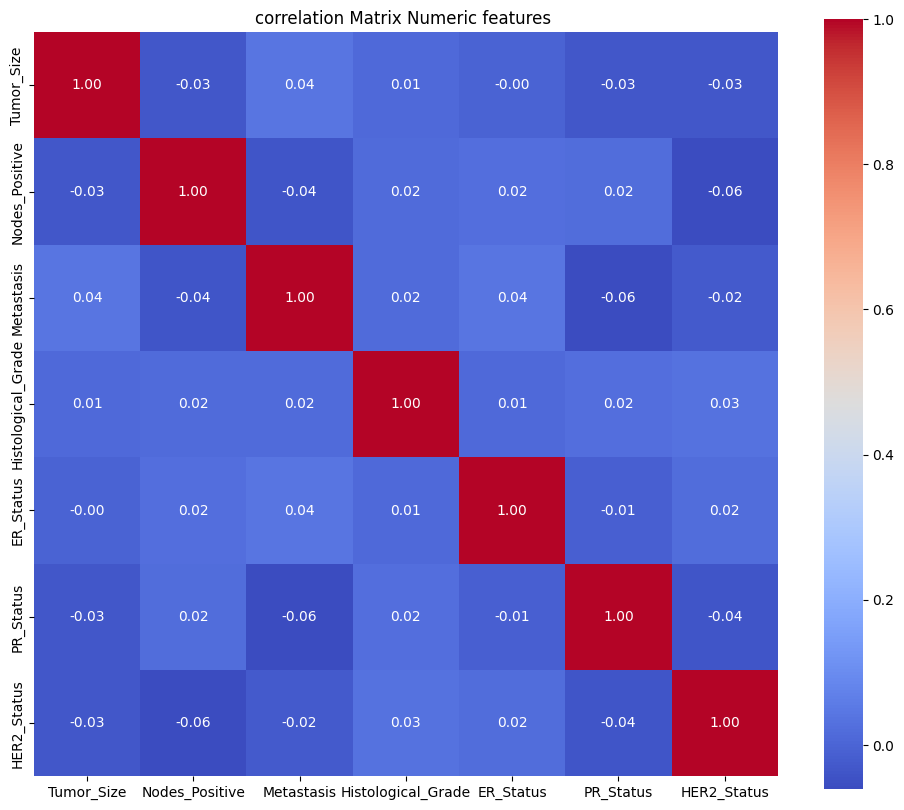

In [31]:
numeric_data =df[numerical_columns]
#compute pairwise correlatio of numerica columns
correlation_matrix = numeric_data.corr()
#plotting corelation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True )
plt.title('correlation Matrix Numeric features ')
plt.show()


In [51]:
data=df.to_csv('Data sets/filtered_data.csv',index=False)
data=pd.read_csv('Data sets\\filtered_data.csv')

In [52]:
data.head()

,Tumor_Size,Nodes_Positive,Metastasis,Histological_Grade,ER_Status,PR_Status,HER2_Status,Stage
0,3.807947,7.0,0,1,1,1,0,III
1,7.346740,7.0,1,2,1,1,1,IV
2,6.026719,4.0,0,3,0,0,1,III
3,1.644585,0.0,1,2,0,0,1,IV
4,0.675028,4.0,0,1,0,1,1,I


## IMPLEMENTIG MODLES

# logistic regression model

D:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 0.96
Testing Accuracy: 0.96


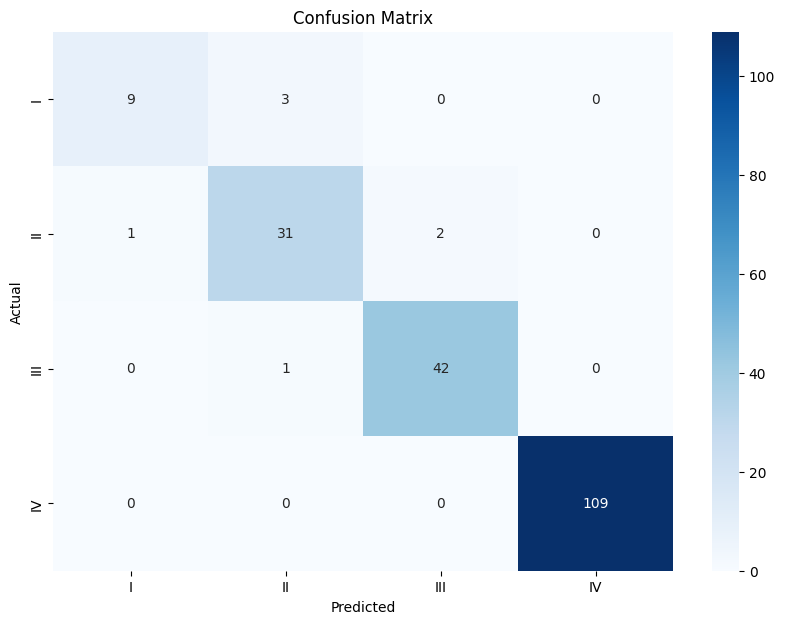

['ML_MODEL/lr_model.pkl']

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Convert categorical stages to numerical
stage_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
data['Stage'] = data['Stage'].map(stage_mapping)

# Define feature columns and target variable
feature_columns = ['Tumor_Size', 'Nodes_Positive', 'Metastasis', 'Histological_Grade', 'ER_Status', 'PR_Status', 'HER2_Status']
X = df[feature_columns]
y = df['Stage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model with one-vs-rest strategy
logreg = LogisticRegression(multi_class='ovr', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = logreg.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = logreg.predict(X_test_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['I', 'II', 'III', 'IV'], yticklabels=['I', 'II', 'III', 'IV'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

import joblib
joblib.dump(gnb, 'ML_MODEL/lr_model.pkl')


# Gaussian Naive Bayes model

Training Accuracy (Gaussian Naive Bayes): 0.98
Testing Accuracy (Gaussian Naive Bayes): 0.98


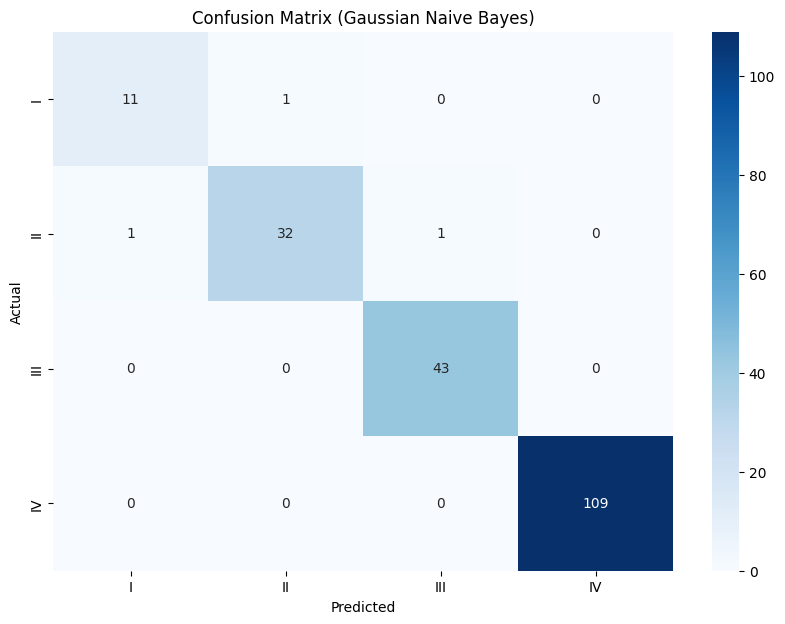

['ML_MODEL/gnb_model.pkl']

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Convert categorical stages to numerical
stage_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
data['Stage'] = data['Stage'].map(stage_mapping)

# Define feature columns and target variable
feature_columns = ['Tumor_Size', 'Nodes_Positive', 'Metastasis', 'Histological_Grade', 'ER_Status', 'PR_Status', 'HER2_Status']
X = df[feature_columns]
y = df['Stage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_train_pred_gnb = gnb.predict(X_train_scaled)
y_test_pred_gnb = gnb.predict(X_test_scaled)

# Calculate training and testing accuracies
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)

print(f'Training Accuracy (Gaussian Naive Bayes): {train_accuracy_gnb:.2f}')
print(f'Testing Accuracy (Gaussian Naive Bayes): {test_accuracy_gnb:.2f}')

# Compute and plot the confusion matrix for Gaussian Naive Bayes
cm = confusion_matrix(y_test, y_test_pred_gnb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['I', 'II', 'III', 'IV'], yticklabels=['I', 'II', 'III', 'IV'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gaussian Naive Bayes)')
plt.show()


import joblib
joblib.dump(gnb, 'ML_MODEL/gnb_model.pkl')
